In [1]:
starting with series model, calc l and c 
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M
c=(w1/w2**.5 - 1/w1) / (x1 - x2*w1/w2)
#c=(w2/w1**.5 - 1/w2) / (x2 - x1*w2/w1)
L = x2/w2 - 1/(c*w2**2)
res_w = (1/(L*c))**.5
res_f = 1 / ( 2 * 3.1415 * (L*c)**.5)
L*1e9, c*1e9, res_f*1e-6

SyntaxError: invalid syntax (<ipython-input-1-aa82bfbaf905>, line 1)

In [ ]:
import numpy as np
import scipy.optimize as opt
from numpy import exp
import timeit

st1 = timeit.default_timer()

def f(variables) :
    (x,y) = variables

    first_eq = x + y**2 -4
    second_eq = exp(x) + x*y - 3
    return [first_eq, second_eq]

solution = opt.fsolve(f, (0.1,1) )
print(solution)


st2 = timeit.default_timer()
print("RUN TIME : {0}".format(st2-st1))

In [ ]:
w1=2*3.1415*10e6
x1=-14.1  # @10M
w2=2*3.1415*15e6
x2=15.4  # @15M

def series_lc(variables) :
    (l,c) = variables

    first_eq = w1*l - 1/(w1*c)  - x1
    second_eq = w2*l - 1/(w2*c) - x2
    return [first_eq, second_eq]

solution = opt.fsolve(series_lc, (1e-9,1e-9) )
L, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

In [ ]:
w1=2*3.1415*10e6
x1=-27  # @10M
y1 = -1 / x1

w2=2*3.1415*20e6
x2=6.6  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    (l,c) = variables

    first_eq = 1/(w1*l) - (w1*c)  - y1
    second_eq = 1/(w2*l) - (w2*c) - y2
    return [first_eq, second_eq]

solution = opt.fsolve(parallel_lc, (1e-9,1e-9) )
L, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))
y1

In [ ]:
# Test parallel maths with the lc from series above
L=473.659e-9
C=362.881e-12
Y10 = 1/(w1*L) - (w1*C)
Y15 = 1/(w2*L) - (w2*C)
1/Y10, 1/Y15

Now let's try with complex numbers

fsolve finds zeros of functions from $R^n \to R$

Try rewriting the function as $R^4 \to R^4$

In [ ]:
w1 = 2 * 3.1415 * 10e6
x1 = 5 -14.1j  # @10M
w2 = 2 * 3.1415 * 15e6
x2 = 5 + 15.4j  # @15M

def series_lc(variables) :
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    first_eq = w1*l + 1/(w1*c)  - x1
    second_eq = w2*l + 1/(w2*c) - x2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(series_lc, (0, 1e-9, 0, 1e-9))
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

In [ ]:
# parallel with complex nos - here the 5R makes a big difference
# should probably include the 5R in series in the equations
w1 = 2 * 3.1415 * 10e6
x1 = 5 -27j  # @10M
y1 = -1 / x1

w2 = 2 * 3.1415 * 20e6
x2 = 5 +6.6j  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    
    first_eq = 1/(w1*l) + (w1*c) - y1
    second_eq = 1/(w2*l) + (w2*c) - y2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(parallel_lc, (0, 1e-9, 0, 1e-9))
print(solution)
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

In [ ]:
# parallel with complex nos and a 5R in series
w1 = 2 * 3.1415 * 10e6
x1 = 5 -27j  # @10M
y1 = -1 / x1

w2 = 2 * 3.1415 * 20e6
x2 = 5 +6.6j  # @20M
y2 = -1 / x2

def parallel_lc(variables) :
    # now with a 5R in series
    (lr, li, cr, ci) = variables
    l = complex(lr, li)
    c = complex(cr, ci)
    
    first_eq = 1/(1/(w1*l) + (w1*c)) + 5 - x1
    second_eq = 1/(1/(w2*l) + (w2*c)) + 5 - x2
    return [first_eq.real, first_eq.imag, second_eq.real, second_eq.imag]

solution = opt.fsolve(parallel_lc, (0, 1e-9, 0, 1e-9))  #fsolve
print(solution)
_, L, _, C = solution
print('L=%.3fnH, C=%.3fpF' % (L*1e9, C*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(L*C)**0.5)))

In [ ]:
import sympy as sp
sp.init_printing()
I = sp.I
w1, x1, w2, x2 = sp.symbols('w1 x1 w2 x2')
sz10 = w1*sl + 1/(w1*sc)
sz15 = w2*sl + 1/(w2*sc)
sL, sC = sp.solve([sz10-x1, sz15-x2], [sl, sc])[0]
L = sL.subs({
    w1:2 * 3.1415 * 10e6,
    x1:5 -14.1j,
    w2:2 * 3.1415 * 15e6,
    x2:5 + 15.4j
})
C = sC.subs({
    w1:2 * 3.1415 * 10e6,
    x1:5 -14.1j,
    w2:2 * 3.1415 * 15e6,
    x2:5 + 15.4j
})
print('L=%.3fnH, C=%.3fpF' % (sp.im(L)*1e9, sp.im(C)*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(sp.im(L) * sp.im(C))**0.5)))
sL, sC

In [ ]:
# x20 = 5 +6.6j
# x10 = 5 -27j
# w20 =  2 * np.pi * 20e6
# w10 = 2 * np.pi * 10e6
import numpy as np
w10, x10, w20, x20 = sp.symbols('w10 x10 w20 x20')
sy10 = 1 /(w10*sl) + (w10*sc)
sz10 = 1 / sy10
sy20 = 1 / (w20*sl) + (w20*sc)
sz20 = 1 / sy20
sL, sC = sp.solve([sz10-x10, sz20-x20], [sl, sc])[0]
sL, sC
#sp.solve([sz10-x10, sz20-x20], [sl, sc])
L = sL.subs({
    w10:2 * np.pi * 10e6,
    x10:5 -27j,
    w20:2 * np.pi * 20e6,
    x20:5 +6.6j
})
C = sC.subs({
    w10:2 * np.pi * 10e6,
    x10:5 -27j,
    w20:2 * np.pi * 20e6,
    x20:5 +6.6j
})
print('L=%.3fnH, C=%.3fpF' % (sp.im(L)*1e9, sp.im(C)*1e12))
print('resonance %fMHz' % (1e-6/(2*3.14159*(sp.im(L) * sp.im(C))**0.5)))

In [ ]:
# series-parallel network
w1 = 2 * 3.1415 * 10e6
x1 = 2.5 -27j  # @10M

w2 = 2 * 3.1415 * 15e6
x2 = 2.5 + 15.4j  # @15M

# THESE VALUES MADE UP TO TEST BUT IT DID NOT WORK...
w3 = 2 * 3.1415 * 12e6
x3 = 2.5 + 0j 

w4 = 2 * 3.1415 * 20e6
x4 = 2.5 +6.6j  # @20M

# series
#cs = 361e-12
#ls = 473e-9
rs = 2.5
# parallel
#cp = 1211e-12
#lp = 126e-9
rp = 300  # FAR TOO DEPENDENT ON THIS VALUE

rs = 2.5
# parallel

# Test with zs calculated from known ls and cs
#x1, x2, x3, x4 = tuple([znet((w, 361e-12, 473e-9, 1211e-12, 126e-9)) for w in [w1, w2, w3, w4]])

def znet(*estimates, w=0):
    """Impedance of the network at w rad/s
    Given  series cs, ls in parallel with cp, lp, rp"""
    #print('est', estimates, w)
    _, cs, _, ls, _, cp, _, lp, rs, _, rp, _ = estimates
    rs, rp = 2.5, 300
    zcs = 1 / (w * cs * 1j)
    zls = w * ls * 1j
    zcp = 1 / (w * cp * 1j)
    zlp = w * lp * 1j
    ys = 1 / (zcs + zls)
    ycp = 1 / zcp
    ylp = 1 / zlp
    yrp = 1 / rp
    yt = ycp + ylp + ys + yrp
    zt = 1 / yt
    return rs + zt

ws = np.linspace(10e6, 20e6, 6)
xs = [znet(0, 361e-12, 0, 473e-9, 0, 1211e-12, 0, 126e-9, 2.5, 0, 300, 0, w=w_) for w_ in ws]
xws = [(x, w) for x, w in zip(xs, ws)]

def series_parallel_lc(variables):
    #print('varis', variables)
    res = [znet(*tuple(variables), w=w_) - x for x, w_ in xws]
    #print('res', res)
    #return res
    return [n for r in res for n in (r.real, r.imag)]

    
# re, im complex 
initial_vec = (0, 362e-12, 0, 473e-9, 0, 1211e-12, 0, 126e-9, 2.5, 0, 300, 0)
solution = opt.fsolve(series_parallel_lc, initial_vec)
print(solution)
#cs, ls, cp, lp = solution
# print('ls=%.3fnH, Cs=%.3fpF,  lps=%.3fnH, cp=%.3fpF' % (ls*1e9, cs*1e12, lp*1e9, cp*1e12))
# print('resonance %fMHz' % (1e-6/(2*3.14159*(ls*cs)**0.5)))
# print('resonance %fMHz' % (1e-6/(2*3.14159*(lp*cp)**0.5)))


In [ ]:
tuple(np.array((1,2,3,4,5,6)))


In [ ]:
test = [(2.5-27j), (2.5+15.4j), (2.5+0j), (2.5+6.6j)]
[n for t in test for n in (t.real, t.imag)]

2.5 + 1/(1/300 + 0.145470159262996*I - 1.59235668789809e-8*I/lp)
2.5 + 1/(1/300 + 0.218339650063741*I - 1.44759698899826e-8*I/lp)
2.5 + 1/(1/300 + 0.989957259775802*I - 1.32696390658174e-8*I/lp)
2.5 + 1/(1/300 - 0.114569481195638*I - 1.22488975992161e-8*I/lp)
2.5 + 1/(1/300 + 0.00725788419932952*I - 1.13739763421292e-8*I/lp)
2.5 + 1/(1/300 + 0.0480704604123758*I - 1.06157112526539e-8*I/lp)
2.5 + 1/(1/300 + 0.0715774091284279*I - 9.95222929936306e-9*I/lp)
2.5 + 1/(1/300 + 0.0885542481688674*I - 9.36680404645935e-9*I/lp)
2.5 + 1/(1/300 + 0.102364134843589*I - 8.84642604387827e-9*I/lp)
2.5 + 1/(1/300 + 0.114396690171118*I - 8.38082467314784e-9*I/lp)


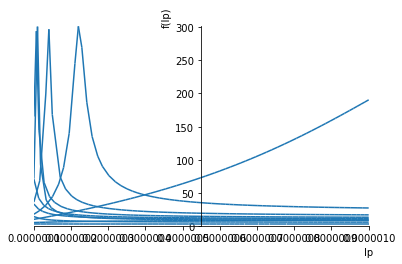

In [83]:
import sympy as sp
f, cs, ls, cp, lp, rs, rp = sp.symbols('f, cs, ls, cp, lp, rs, rp')
w = 2 * 3.14 * f
zcs = 1 / (w * cs * 1j)
zls = w * ls * 1j
zcp = 1 / (w * cp * 1j)
zlp = w * lp * 1j
ys = 1 / (zcs + zls)
ycp = 1 / zcp
ylp = 1 / zlp
yrp = 1 / rp
yt = ycp + ylp + ys + yrp
zt = 1 / yt
zf = rs + zt
zf

#zoff = sp.symbols('zoff')
zoff = zf.subs({
    #f:10e6,
    cs:361e-12,
    ls:473e-9,
    cp:1211e-12,
    #lp:126e-9,
    rs:2.5,
    rp:300
})

args = []
for freq in range(100, 200, 10):
    zatf = zoff.subs({f:freq*1e5})
    print(zatf)
    args.append(abs(zatf))
args.append((lp, 1e-7, 1e-6))
#print(args)
#dlp = sp.diff(zoff, f)
#sp.plot(abs(dlp), (f, 10e6, 20e6))
#sp.plot(abs(zoff), (lp, 1e-9, 1e-6))
#sp.plot(abs(zoff), (lp, 1e-9, 1e-6))
#args = ((abs(zoff), (rp, 0.1, 1000)), (3*abs(zoff), (rp, 0.1, 1000)))
sp.plot(*tuple(args))# xscale='log', adaptive=False)
#sp.plot(abs(zoff), (f, 10e6, 20e6))
# sp.plot(sp.re(zoff), (f, 10e6, 20e6))
# sp.plot(sp.im(zoff), (f, 10e6, 20e6))

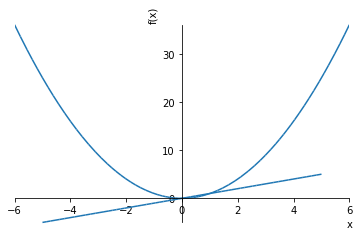

In [45]:
x = sp.symbols('x')
sp.plot((x**2, (x, -6, 6)), (x, (x, -5, 5)))


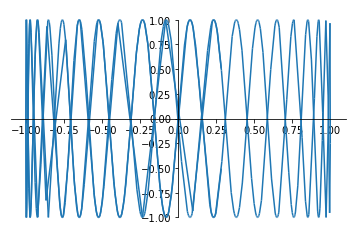

In [93]:
from sympy import symbols, cos, sin
from sympy.plotting import plot_parametric
u = symbols('u')

plot_parametric(cos(u), sin(20*u), (u, -5, 5))